#Develop a Neural Network that can Read Handwriting

LETS GROW MORE virtual internship program

DATA SCIENCE intern april 2023

In [ ]:
#importing important libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets
from sklearn.metrics import confusion_matrix


In [ ]:
#loading dataset
mnist=tf.keras.datasets.mnist
#mnist data set is built in datasets in keras library


#splitting dataset

mnist dataset is already divided into training data and testing data 60,000 are training data and 10,000 are testing data

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**shape**

In [ ]:
x_test.shape,x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [ ]:
#Normalizing the data
x_train=x_train/255
x_test=x_test/255


**Images** of dataset

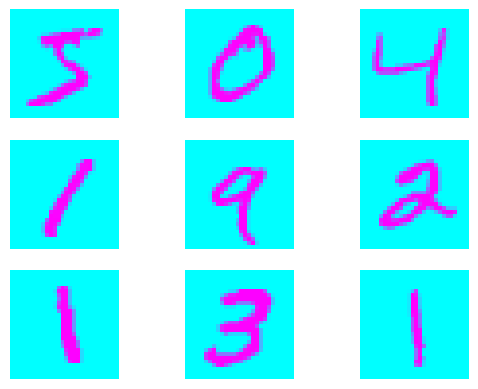

In [ ]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap=plt.cm.cool)
  plt.axis(False)

In [ ]:
#data in the form of matrix
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [ ]:
#reshaping the data in dataset
x_train=x_train.reshape(60000,28,28)
x_test=x_test.reshape(10000,28,28)

converting 2D array into 1d array by using CNN MODEL

In [ ]:
#imposing layers of neural network by using tensorflow
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, LSTM, Dropout
network=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation="relu"),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
network.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
#performance of the network model evaluation
network.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3931 - accuracy: 0.0995


[2.3931338787078857, 0.09950000047683716]

Training the data of network

In [ ]:
network.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1185 - accuracy: 0.9652
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0821 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0599 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9885


In [ ]:
y_predict=[]
predict=network.predict(x_test)
for i in predict:
  y_predict.append(np.argmax(i))

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predict=np.array(y_predict)
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
dd=confusion_matrix(y_test,y_predict)
dd

array([[ 974,    0,    1,    0,    0,    1,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    2,    2,    0,    1,    0],
       [   6,    3, 1007,    3,    0,    0,    1,    4,    7,    1],
       [   1,    0,    7,  986,    0,    2,    0,    2,    1,   11],
       [   2,    0,    6,    1,  955,    0,    3,    3,    1,   11],
       [   3,    1,    0,    5,    0,  868,    4,    2,    4,    5],
       [  10,    3,    1,    1,    3,    2,  937,    0,    1,    0],
       [   2,    6,   11,    3,    0,    0,    0,  997,    1,    8],
       [   7,    0,    7,    5,    3,    1,    2,    4,  942,    3],
       [   5,    3,    1,    4,    3,    2,    1,    3,    0,  987]])

### *`plotting of test variables:`*

actual value in Title , predicted value in lable

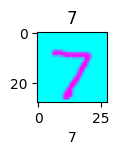

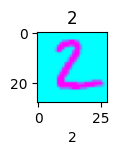

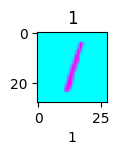

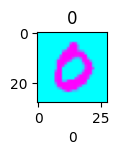

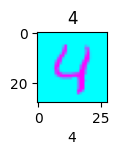

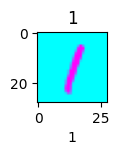

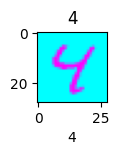

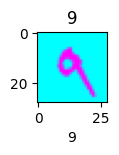

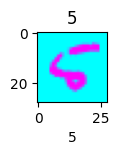

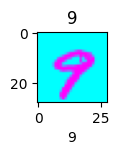

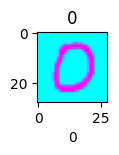

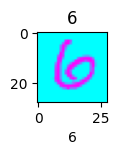

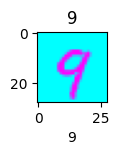

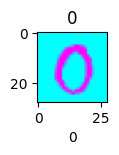

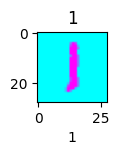

In [ ]:
for i in range(0,15):
  plt.figure(figsize=(16,12))
  plt.subplot(1,15,i+1)
  plt.imshow(x_test[i],cmap=plt.cm.cool)
  plt.xlabel(y_predict[i])
  plt.title(y_test[i])

The upper value is the real value and the lower value is the predicted value



In [ ]:
#representing in the tabular form 
real_val=y_test
predicted=y_predict
final=pd.DataFrame({"real_val ":real_val,"predicted ":predicted})
final.head(40)

,real_val,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


#comparing seperately both real value and predicted value

In [ ]:
#predicted value
predict=network.predict(x_test)
print(np.argmax(predict[5]))

313/313 [==============================] - 1s 2ms/step
1


(-0.5, 27.5, 27.5, -0.5)

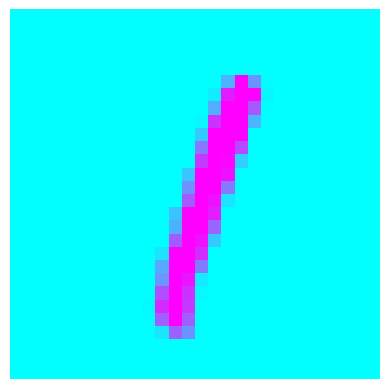

In [ ]:
#real value
plt.imshow(x_test[5],cmap=plt.cm.cool)
plt.axis(False)

# Hence accurate prediction of the handwritten image has been given throw our neural network
